# FORECASTING USING BASELINE MODELS

_**Consider appropriate time-series dataset and forecast using baseline models.**_

In this experiment, the following naive approaches will be used to create baselines models to forecast the quarterly EPS of Johnson & Johnson.

1) Historical mean of the entire train set
2) Historical mean of the last year in the train set
3) Last known value of the train set
4) Naive seasonality


In [1]:
# Imports packages

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

### Retrieving & Analyzing the Data

The dataset that was considered in this experiment represents the quarterly earnings per share (EPS) in US dollars of Johnson & Johnson stock from 1960 to 1980.

In [2]:
# Loads the dataset
eps = pd.read_csv("../Data/time-series/johnson_&_johnson_stock_EPS.csv")

# Shows few instances from top
display(eps.head())

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
# Shows few instances from bottom
display(eps.tail())

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [4]:
# Checks the shape of the dataset
print(eps.shape)

(84, 2)


In [5]:
# Checks the descriptive statistics of the dataset
print(eps.describe())

            data
count  84.000000
mean    4.799762
std     4.309991
min     0.440000
25%     1.247500
50%     3.510000
75%     7.132500
max    16.200000


Text(0.5, 1.0, 'Quarterly EPS of Johnson & Johnson')

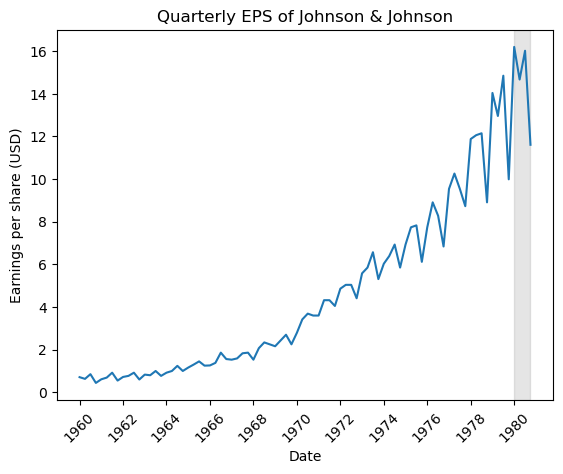

In [6]:
# Plots the dataset to visualize it

plt.plot(eps['date'], eps['data'])
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.xticks(
    np.arange(0, 81, 8),                                                # Sets the location of the ticks
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980], # Sets the labels for each tick location
    rotation=45                                                         # Rotates the tick labels (at given degree) to enhance ligibility
)
plt.axvspan(80, 83, color='#808080', alpha=0.2)   # Highlights forecasting region
plt.title("Quarterly EPS of Johnson & Johnson")   # Sets plot title

The forecasting period is illustrated by the gray zone in above figure.

**Below ones are the findings out of the above figure.**
1. It has a trend since EPS is increasing over time.
2. There is a seasonality, since there are peaks and troughs (a low point between two high points) repeated over the course of a year, or four quarters.

### Preparing Datasets

In [7]:
# Splits data into train and test set.

X_train = eps[:-4]    # Contain EPS data for all quarters except the last four.
X_test = eps[-4:]     # Contains the EPS data only the last four quarters.

In [8]:
# Checks the train dataset

display(X_train)

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
75,1978-10-01,8.91
76,1979-01-01,14.04
77,1979-04-02,12.96
78,1979-07-02,14.85


In [9]:
# Checks the test dataset

display(X_test)

,date,data
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


### Forecasting using Historical  Mean of the Entire Train Set
It simply computes the mean of the values over a certain period and assume that future values will be equal to that mean. In the context of predicting the EPS for Johnson & Johnson, the assumption will be like 

_The average EPS between 1960 and 1979 was USD 4.31. Therefore, it is expected that the EPS over the next four quarters of 1980to be equal to USD 4.31 per quarter._

In [10]:
# Calculates the historical mean of the entire train set
hist_mean = np.mean(X_train['data'])

print("$", round(hist_mean,2))

$ 4.31


This means that from 1960 to the end of 1979, the quarterly EPS of Johnson & Johnson was **\$4.31** on average.

In [11]:
# Creates a new column that holds the historical mean of the train set 
# to naively forecast this value for each quarter of 1980.

X_test.loc[:, "forecast_mean"] = hist_mean

display(X_test)

/tmp/ipykernel_325053/445827354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, "forecast_mean"] = hist_mean


,date,data,forecast_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [12]:
# Evaluates forecasting performance
hist_mean_mape = mean_absolute_percentage_error(X_test["data"], X_test["forecast_mean"])

print(round(hist_mean_mape,2))

0.7


Text(0.5, 1.0, 'Forecasting using Historical Mean.')

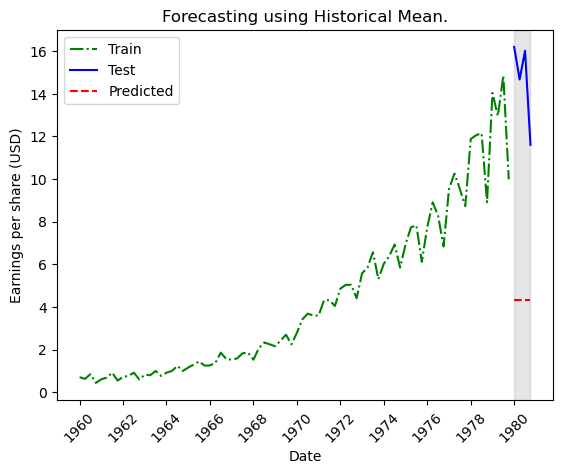

In [13]:
# Plots the forecasting

plt.plot(X_train['date'], X_train['data'], 'g-.', label='Train')
plt.plot(X_test['date'], X_test['data'], 'b-', label='Test')
plt.plot(X_test['date'], X_test['forecast_mean'], 'r--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980], rotation=45)
plt.legend()
plt.title("Forecasting using Historical Mean.")


### Forecasting using Last Year's Mean

It was found that forecasting using entire historical mean did not do well because earlier values do not seem to be predictive of future values in the long term because of the positive trend component in the dataset. Earlier values are too small to be representative of the new level the EPS reaches toward the end of 1979 and onwards. The followings experiment by taking the mean of the last year in the training set to forecast each quarter in the following year. The assumption will be like

_If the EPS is USD 0.71 for this quarter, then the EPS will also be USD 0.71 for next quarter._

In [14]:
# Calculates the mean of the four quarters in last year [1979] in train set 
last_year_mean = np.mean(X_train.data[-4:])

print("$", round(last_year_mean, 2))

$ 12.96


In [15]:
# Creates a new column that holds the mean of the last 4 quarters 
# in 1979 to naively forecast this value for each quarter of 1980.

X_test.loc[:, 'forecast_last_year_mean'] = last_year_mean

/tmp/ipykernel_325053/1630128810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, 'forecast_last_year_mean'] = last_year_mean


In [16]:
display(X_test)

,date,data,forecast_mean,forecast_last_year_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [17]:
# Evaluates forecasting performance
last_year_mean_mape = mean_absolute_percentage_error(X_test["data"], X_test["forecast_last_year_mean"])

print(last_year_mean_mape)

0.155963680725103


Text(0.5, 1.0, 'Forecasting using the Last Year Mean.')

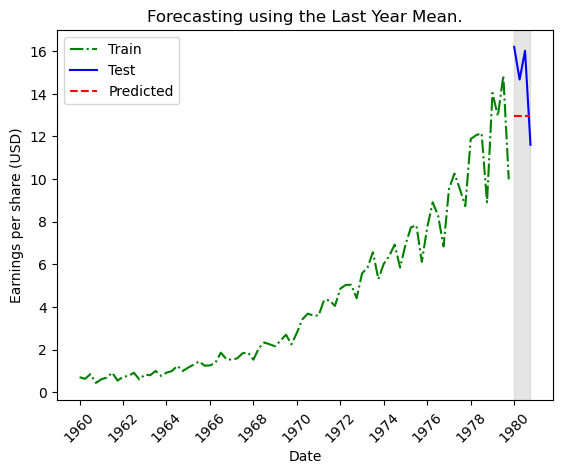

In [18]:
# Plots the forecasting

plt.plot(X_train['date'], X_train['data'], 'g-.', label='Train')
plt.plot(X_test['date'], X_test['data'], 'b-', label='Test')
plt.plot(X_test['date'], X_test['forecast_last_year_mean'], 'r--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980], rotation=45)
plt.legend()
plt.title("Forecasting using the Last Year Mean.")


This new simple baseline is a clear improvement over the previous one as MAPE was decreased from 70% to 15.6%.

### Forecasting using Last Known Value

As best baseline has been the mean of the last recorded year in our training set, the next hypothesis that could be tested is that using the last known value of the training set as a baseline model if it provides better forecasts. The assumption will be like

_If the EPS is dollar 9.99 for the last quarter of 1979, then the EPS will also be dollar 9.99 for next four quarters._

In [19]:
# Gets the last known value of the train set, which corresponds to the EPS for the last quarter of 1979.
last_value = X_train.data.iloc[-1]

print("$", round(last_value, 2))

$ 9.99


In [20]:
# Creates a new column that holds the the last value of the last 4 quarter
# in 1979 to naively forecast this value for each quarter of 1980.

X_test.loc[:, 'forecast_last_value'] = last_value

/tmp/ipykernel_325053/899375005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, 'forecast_last_value'] = last_value


In [21]:
display(X_test)

,date,data,forecast_mean,forecast_last_year_mean,forecast_last_value
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [22]:
# Evaluates forecasting performance
last_value_mape = mean_absolute_percentage_error(X_test["data"], X_test["forecast_last_value"])

print(last_value_mape)

0.30457277908606534


Text(0.5, 1.0, 'Forecasting using the Last Known Value.')

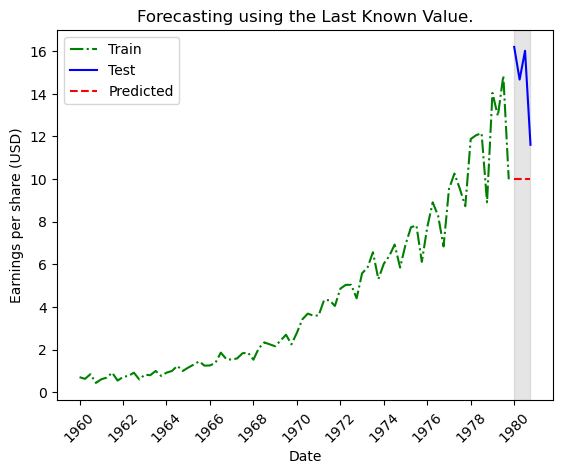

In [23]:
# Plots the forecasting

plt.plot(X_train['date'], X_train['data'], 'g-.', label='Train')
plt.plot(X_test['date'], X_test['data'], 'b-', label='Test')
plt.plot(X_test['date'], X_test['forecast_last_value'], 'r--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980], rotation=45)
plt.legend()
plt.title("Forecasting using the Last Known Value.")


The new hypothesis with a MAPE of 30.45% did not improve upon the last baseline that was built since and it achieved a MAPE of 15.60%.

### Forecasting using Naive Seasonality

As there is clear cyclical patterns in the data, this component can be considered to build a new baseline model using seasonality. The assumption will be like

_If the EPS is dollar 14.04 for the first quarter of 1979, then the EPS for the first quarter of 1980 will also be dollar 14.04._

In [24]:
# Copies last four values of the train set, which correspond to the four quarters of 1979,
# and assigning them to the corresponding quarters in 1980. 

X_test.loc[:, 'forecast_last_quarter'] = X_train['data'][-4:].values

/tmp/ipykernel_325053/3836507777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, 'forecast_last_quarter'] = X_train['data'][-4:].values


In [25]:
display(X_test)

,date,data,forecast_mean,forecast_last_year_mean,forecast_last_value,forecast_last_quarter
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [26]:
# Evaluates forecasting performance
last_quarter_mape = mean_absolute_percentage_error(X_test["data"], X_test["forecast_last_quarter"])

print(last_quarter_mape)

0.11561658552433654


Text(0.5, 1.0, 'Forecasting using the Last Quarter Value.')

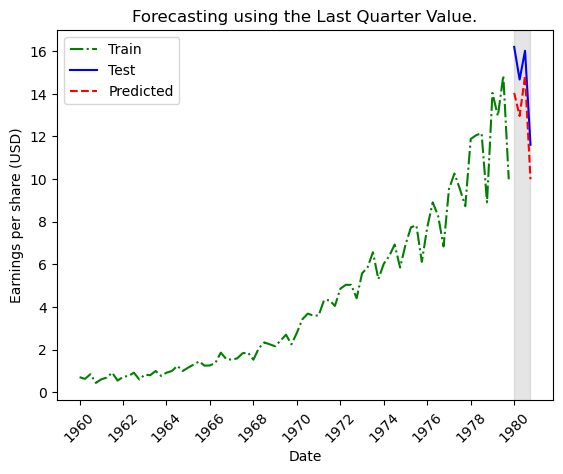

In [27]:
# Plots the forecasting

plt.plot(X_train['date'], X_train['data'], 'g-.', label='Train')
plt.plot(X_test['date'], X_test['data'], 'b-', label='Test')
plt.plot(X_test['date'], X_test['forecast_last_quarter'], 'r--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980], rotation=45)
plt.legend()
plt.title("Forecasting using the Last Quarter Value.")


This gives us a MAPE of 11.56%, which is the lowest MAPE from all the baselines so far.

Text(0.5, 1.0, 'Performance [MAPE] of the Baselines Models')

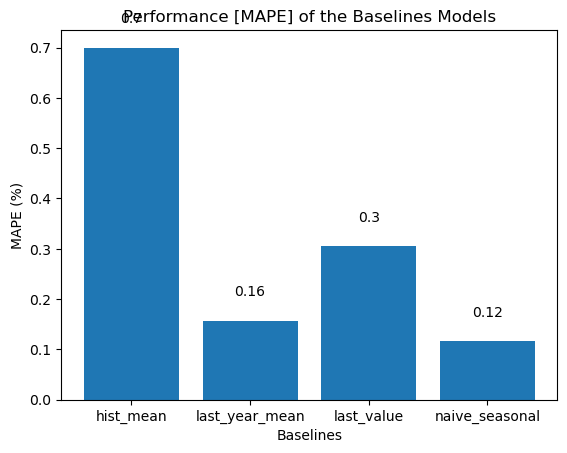

In [28]:
x = ['hist_mean', 'last_year_mean', 'last_value', 'naive_seasonal']
y = [hist_mean_mape, last_year_mean_mape, last_value_mape, last_quarter_mape]

plt.bar(x, y)
plt.xlabel('Baselines')
plt.ylabel('MAPE (%)')

for idx, val in enumerate(y):
    plt.text(x=idx, y=val+0.05, s=round(val, 2), ha="center")
    
plt.title("Performance [MAPE] of the Baselines Models")
plt.tight_layout()
plt.show()

### Observations [IN DRAFT]

- In general, future values depend on past values, but not those too far back in time. It was evident from the fact that predicting the mean EPS from 1960 to 1979 yielded worse forecasts than predicting the mean EPS over 1979. 

- naive seasonal forecast resulted in the lowest MAPE of all the baselines we built in this chapter. This means that seasonality has a significant impact on future values, since repeating the last season into the future yields fairly accurate forecasts - clearly observe a cyclical pattern being repeated every year in figure - Seasonal effects will have to be considered when we develop a more complex forecasting model

a baseline model serves as a basis for comparison compare the MAPE from a complex model against the MAPE of our naive seasonal forecast. If the MAPE of a complex model is lower than 11.56%, then we’ll know that we have a better-performing model.